# **Desafio Cientista de Dados**

## Enunciado:

> #### Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).

In [717]:
# Instala as dependências necessárias 
%pip install numpy pandas seaborn matplotlib scikit-learn tensorflow joblib pygam

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import tensorflow as tf
import joblib

from pygam import LinearGAM, s 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from joblib import dump, load

print("Numpy: ", np.__version__)
print("Pandas: ", pd.__version__)
print("Seaborn: ", sns.__version__)
print("Sklearn: ", sk.__version__)
print("Tensorflow: ", tf.__version__)
print("Joblib: ", joblib.__version__)


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Numpy:  2.3.2
Pandas:  2.3.2
Seaborn:  0.13.2
Sklearn:  1.7.1
Tensorflow:  2.20.0
Joblib:  1.5.2


In [718]:
path = "/Users/beatriz/Documents/repo/LH-CD-BEATRIZPEIXOTOFREIRE/data/Desafio Indicium IMDB.csv"

df = pd.read_csv(path)
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [719]:
df.shape
df.info()
df.describe()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,999.0,500.000000,288.530761,1.0,250.5,500.0,749.5,999.0
IMDB_Rating,999.0,7.947948,0.272290,7.6,7.7,7.9,8.1,9.2
Meta_score,842.0,77.969121,12.383257,28.0,70.0,79.0,87.0,100.0
No_of_Votes,999.0,271621.422422,320912.621055,25088.0,55471.5,138356.0,373167.5,2303232.0


# **Análise Exploratória dos Dados (EDA)**

### **Perguntas guias:**

1. Um filme bem avaliado é um filme que arrecadou muito?

2. Um filme gera mais renda bruta dependendo do diretor ou do elenco?

3. Qual a relação entre o número de votos no IMDB e a renda bruta do filme?

4. O que os dados de outras plataformas para avaliar filmes, como Letterboxd e Rotten Tomatoes, revelam?

5. Quais gêneros tem o maior retorno financeiro?

6. Tendência histórica dos gêneros de filme: qual ano saíram mais filmes daquele gênero e qual ano saíram menos?

7. A classificação etária influencia a receita bruta?

---
# **Perguntas dos stakeholders**

> #### 1. Qual filme você recomendaria para uma pessoa que você não conhece?
> #### 2. Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
> #### 3. Quais insights podem ser tirados com a coluna `Overview`? É possível inferir o gênero do filme a partir dessa coluna?


É necessário realizar uma EDA completa para dar respostas embasadas, mas podemos deduzir o seguinte:  

1. Recomendaria filmes bem avaliados pelo público geral e com classificação entre G e PG-13. Vale a pena pesquisar os gêneros mais promissores e ir afunilando para encontrar uma resposta.

2. Isso vai ser revelado na análise exploratória por meio de gráficos e correlações

3. Podemos agrupar por gênero e ver quais são as palavras chaves usando NLP (Natural Language Processing) para descobrir quais temáticas específicas são mais populares nesse gênero. Para conhecer o gênero, seria possível sim por meio de um modelo que use algoritmos de classificação.


### **1. Um filme bem avaliado é um filme que arrecadou bastante?**

Vamos comparar os dados das colunas `Gross` e `IMDB_Rating`

In [720]:
#Discretizando dados da receita bruta e formatando os valores recebidos

df['Gross'] = df['Gross'].replace(',', '', regex=True).astype(float)
gross = pd.cut(df['Gross'].dropna(),
               bins=[0, 300000, 600000, 900000, 1200000, 3000000,
                     9000000, 27000000, 90000000, 120000000,
                     270000000, 300000000, 900000000, 1000000000
                     ],
               labels = ["0-300K", "300K-600K", "600K-900K", "900K-1.2M",
                         "1.2M-3M", "3M-9M", "9M-27M", "27M-90M", "90M-120M",
                         "120M-270M", "270M-300M", "300M-900M", "900M-1B"
                        ]
              )

gross.value_counts()

Gross
27M-90M      194
9M-27M       128
3M-9M        110
120M-270M    106
0-300K        69
1.2M-3M       66
90M-120M      44
300M-900M     37
300K-600K     24
900K-1.2M     23
600K-900K     18
270M-300M     10
900M-1B        1
Name: count, dtype: int64

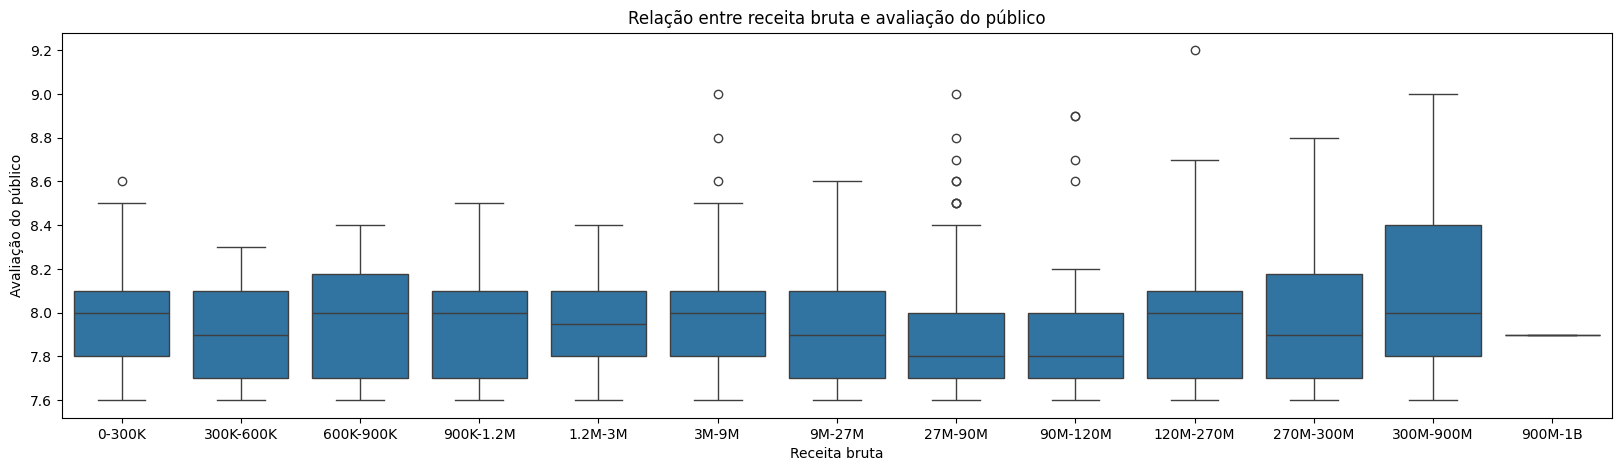

In [721]:
#Gráfico que relaciona receita bruta com avaliação

plt.figure(figsize=(20, 5))
sns.boxplot(x=gross, y=df.IMDB_Rating)
plt.title("Relação entre receita bruta e avaliação do público")
plt.xlabel("Receita bruta")
plt.ylabel("Avaliação do público")
plt.show()

In [722]:
# Estatísticas de No_of_Votes
votes_max = df['No_of_Votes'].max()
votes_min = df['No_of_Votes'].min()
votes_mean = df['No_of_Votes'].mean()
votes_median = df['No_of_Votes'].median()
votes_mode = df['No_of_Votes'].mode()

print(f'Valor máximo: {votes_max}')
print(f'Valor mínimo: {votes_min}')
print(f'Média: {votes_mean}')
print(f'Mediana: {votes_median}')
print(f'Moda: {votes_mode[0]}')

Valor máximo: 2303232
Valor mínimo: 25088
Média: 271621.42242242245
Mediana: 138356.0
Moda: 65341


In [723]:
# Discretizando dados de No_of_Votes e formatando os valores recebidos
df['No_of_Votes'] = df['No_of_Votes'].replace(',', '', regex=True).astype(float)
votes = pd.cut(df['No_of_Votes'].dropna(),
               bins=[0, 30000, 60000, 90000, 120000, 300000,
                     900000, 1200000, 2700000
                    ],
               labels = ["0-30K", "30K-60K", "60K-90K", "90K-120K",
                         "120K-300K", "300K-900K", "900K-1.2M", "1.2M-2.7M"
                        ]
              )

votes.value_counts()

No_of_Votes
300K-900K    245
120K-300K    229
30K-60K      221
60K-90K      120
90K-120K      72
0-30K         55
900K-1.2M     35
1.2M-2.7M     22
Name: count, dtype: int64

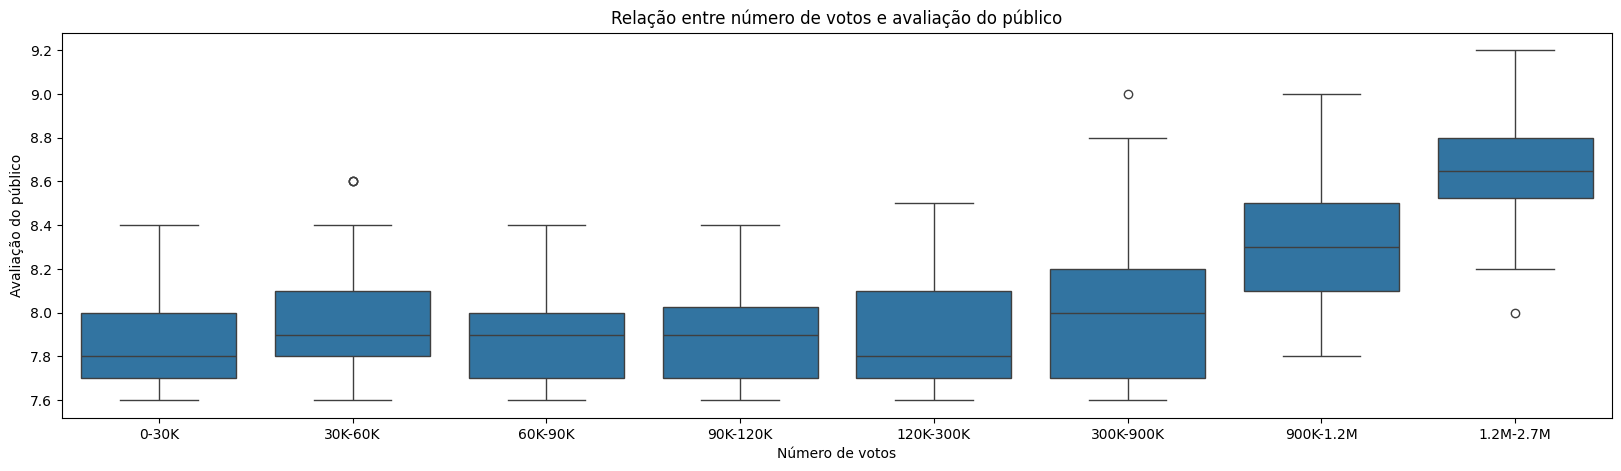

In [724]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=votes, y=df.IMDB_Rating)
plt.title("Relação entre número de votos e avaliação do público")
plt.xlabel("Número de votos")
plt.ylabel("Avaliação do público")
plt.show()

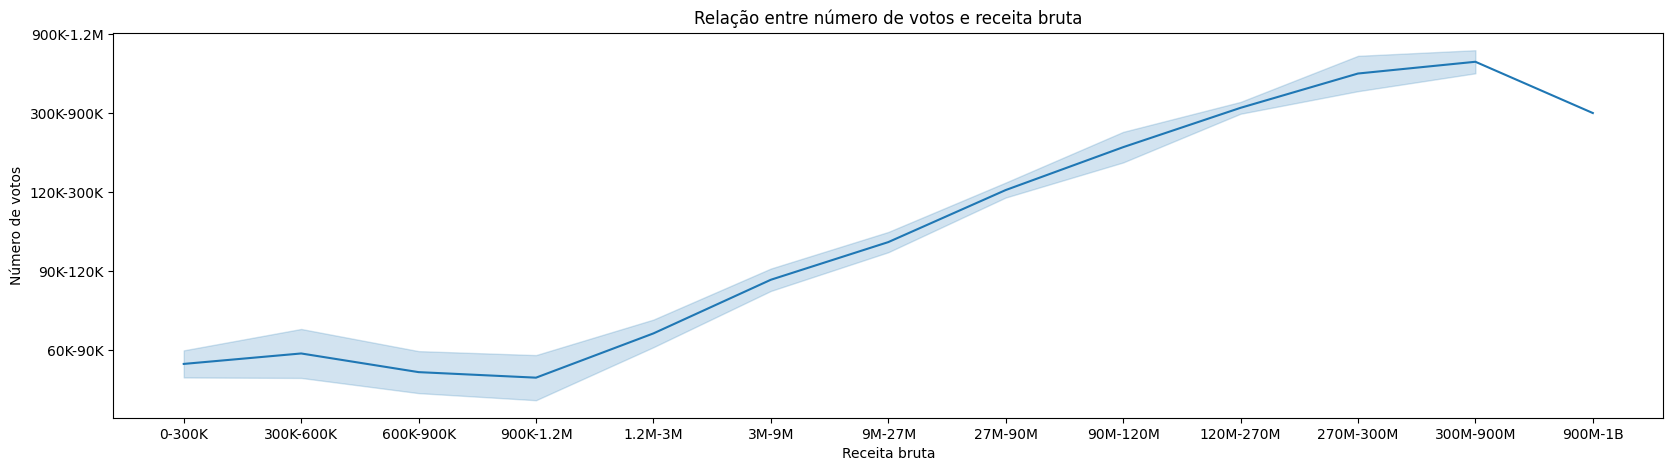

In [725]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=df, x=gross, y=votes, errorbar="se") 
plt.title("Relação entre número de votos e receita bruta")
plt.ylabel("Número de votos")
plt.xlabel("Receita bruta")
plt.gca().invert_yaxis()
plt.show()

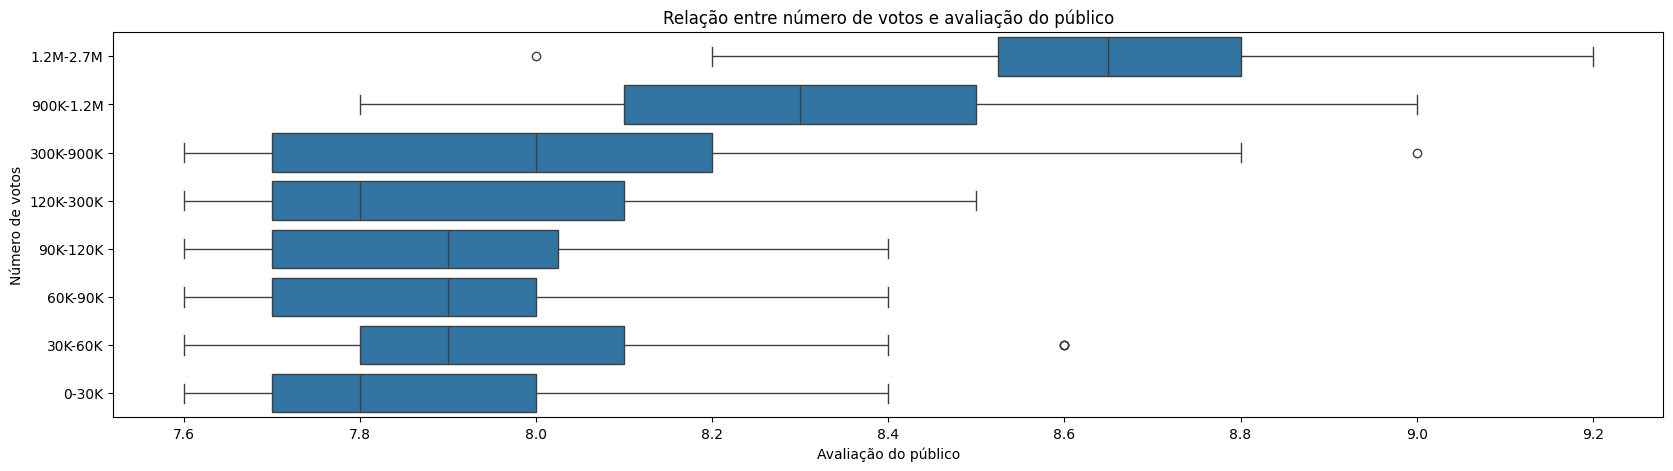

In [726]:
plt.figure(figsize=(20, 5))
sns.boxplot(x=df.IMDB_Rating, y=votes)
plt.title("Relação entre número de votos e avaliação do público")
plt.xlabel("Avaliação do público")
plt.ylabel("Número de votos")
plt.gca().invert_yaxis()
plt.show()

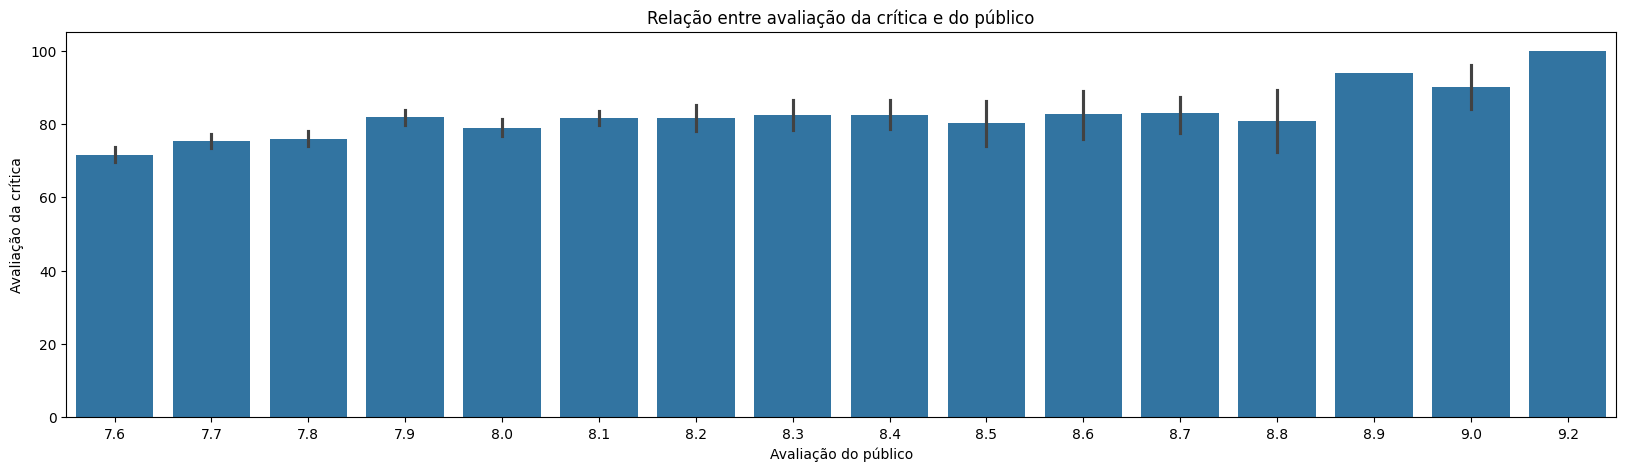

In [727]:
plt.figure(figsize=(20, 5))
sns.barplot(x='IMDB_Rating', y="Meta_score", data=df)
plt.title("Relação entre avaliação da crítica e do público")
plt.xlabel("Avaliação do público")
plt.ylabel("Avaliação da crítica")
plt.show()

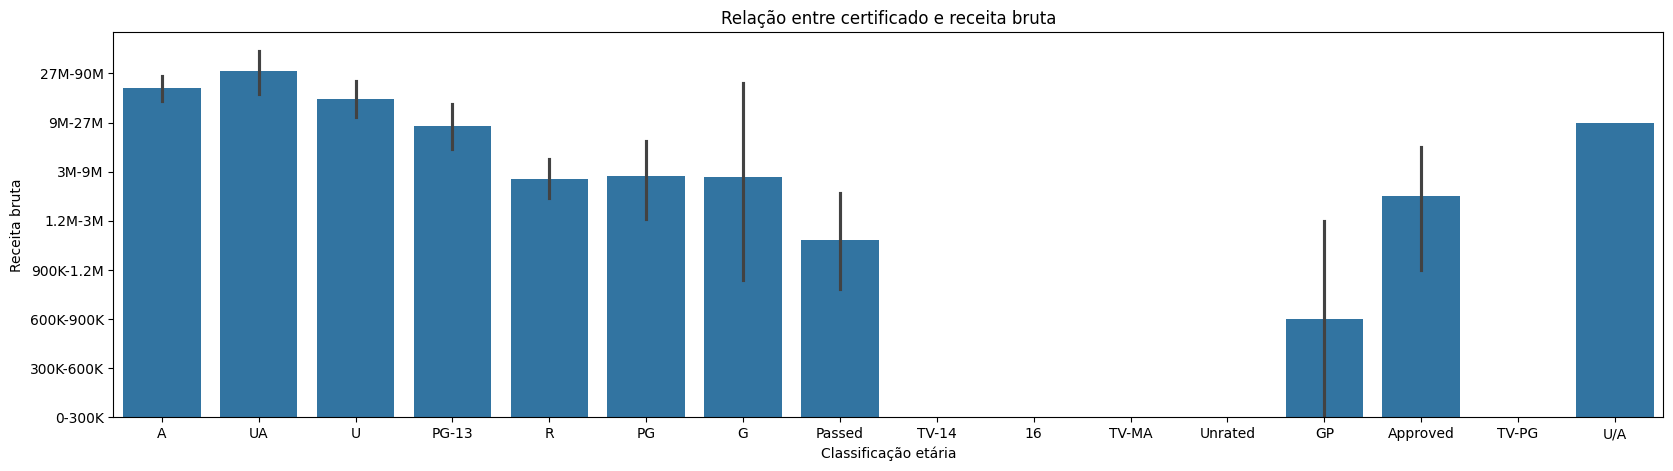

In [728]:
plt.figure(figsize=(20, 5))
sns.barplot(x=df.Certificate, y=gross)
plt.title("Relação entre certificado e receita bruta")
plt.xlabel("Classificação etária") 
plt.ylabel("Receita bruta")
plt.gca().invert_yaxis()
plt.show()

In [729]:
# Imprimindo valores de Certificate
df.Certificate.head(1000).fillna(0)

0             A
1            UA
2             A
3             U
4             U
5             A
6             A
7            UA
8             A
9             U
10           UA
11            A
12           UA
13            A
14            A
15           UA
16            A
17        PG-13
18            A
19            U
20           UA
21            A
22            U
23            R
24            A
25            U
26            A
27            A
28           UA
29            0
30            U
31           PG
32            A
33            A
34           UA
35            U
36            A
37            R
38           UA
39            R
40            A
41            A
42            U
43            U
44            U
45            U
46            U
47            U
48            A
49            U
50            G
51            G
52            A
53            0
54           UA
55            U
56            U
57            U
58           UA
59           UA
60            U
61            A
62      

### **Classificação Etária - Mínimo de idade** 

*   A (All Ages) - 0 
*   UA (Universal Adult Guidance) - 12 
*   U (Universal) - 0 
*   PG-13 - 13
*   R (Restricted) - 17 
*   PG (Parental Guidance) - 10 
*   G (General Audience) - 0
*   Passed (Para todos) - 0
*   TV-14 - 14 
*   16 - 16
*   TV-MA (Mature) - 17 
*   Unrated (sem classificação) - 0 
*   GP (Parental Guidance de 1970) - 10 
*   Approved (todas as idades) - 0 
*   TV-PG - 10 

**OBS) Algumas classificações são de outros países ou não se aplicam mais hoje em dia.**

In [730]:
# Encodando dados de Certificate de acordo com a idade mínima recomendada
certificate_encoded = { 
    "A" : 0, 
    "UA" : 12, 
    "U" : 0, 
    "PG-13" : 13,
    "R" : 17,
    "PG" : 10, 
    "G" : 0,
    "Passed" : 0,
    "TV-14" : 14,
    "16" : 16,
    "TV-MA" : 17, 
    "Unrated" : 0, 
    "GP" : 10,
    "Approved" : 0, 
    "TV-PG" : 10 
}

classification = df['Certificate'].map(certificate_encoded)
label_encoder = LabelEncoder()
label_encoder.fit(classification.fillna(0))
label_encoder.transform([])

classification

0       0.0
1      12.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7      12.0
8       0.0
9       0.0
10     12.0
11      0.0
12     12.0
13      0.0
14      0.0
15     12.0
16      0.0
17     13.0
18      0.0
19      0.0
20     12.0
21      0.0
22      0.0
23     17.0
24      0.0
25      0.0
26      0.0
27      0.0
28     12.0
29      NaN
30      0.0
31     10.0
32      0.0
33      0.0
34     12.0
35      0.0
36      0.0
37     17.0
38     12.0
39     17.0
40      0.0
41      0.0
42      0.0
43      0.0
44      0.0
45      0.0
46      0.0
47      0.0
48      0.0
49      0.0
50      0.0
51      0.0
52      0.0
53      NaN
54     12.0
55      0.0
56      0.0
57      0.0
58     12.0
59     12.0
60      0.0
61      0.0
62     12.0
63     12.0
64      0.0
65      0.0
66      0.0
67      0.0
68     12.0
69      0.0
70      0.0
71      0.0
72      0.0
73     17.0
74     17.0
75      0.0
76      NaN
77      0.0
78      0.0
79      0.0
80      0.0
81      0.0
82      0.0
83  

In [731]:
# Contando menções de diretores
pd.set_option('display.max_rows', None)
directors = df.Director.value_counts()
directors_min4 = directors[directors >= 4].index
directors_min4

df_filtered_directors = df[df['Director'].isin(directors_min4)]

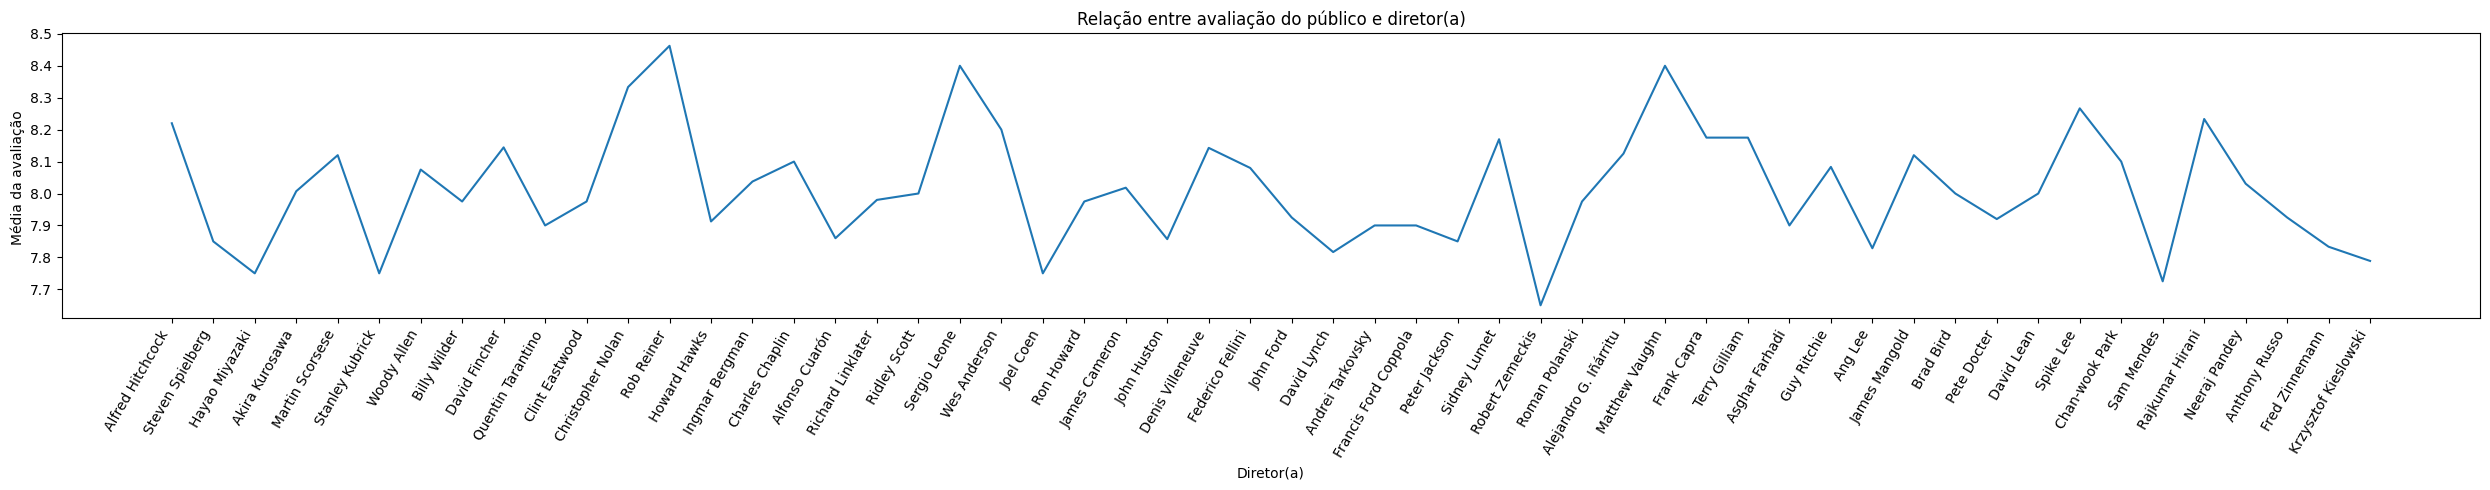

In [732]:
# Média das notas por diretor (notas dividido por quantidade de filmes)
mean_director = df_filtered_directors.groupby('Director')['IMDB_Rating'].mean()

plt.figure(figsize=(25, 5))
sns.lineplot(x=directors_min4, y=mean_director)
plt.title("Relação entre avaliação do público e diretor(a)")
plt.xlabel("Diretor(a)")
plt.xticks(rotation=60, ha='right')
plt.ylabel("Média da avaliação ")
plt.tight_layout()
plt.show()

In [733]:
# Ajustando dados de Star1
pd.set_option('display.max_rows', None)
star1 = df.Star1.value_counts()
star1_min4 = star1[star1 >= 4].index
star1_min4

df_filtered_star1 = df[df['Star1'].isin(star1_min4)]

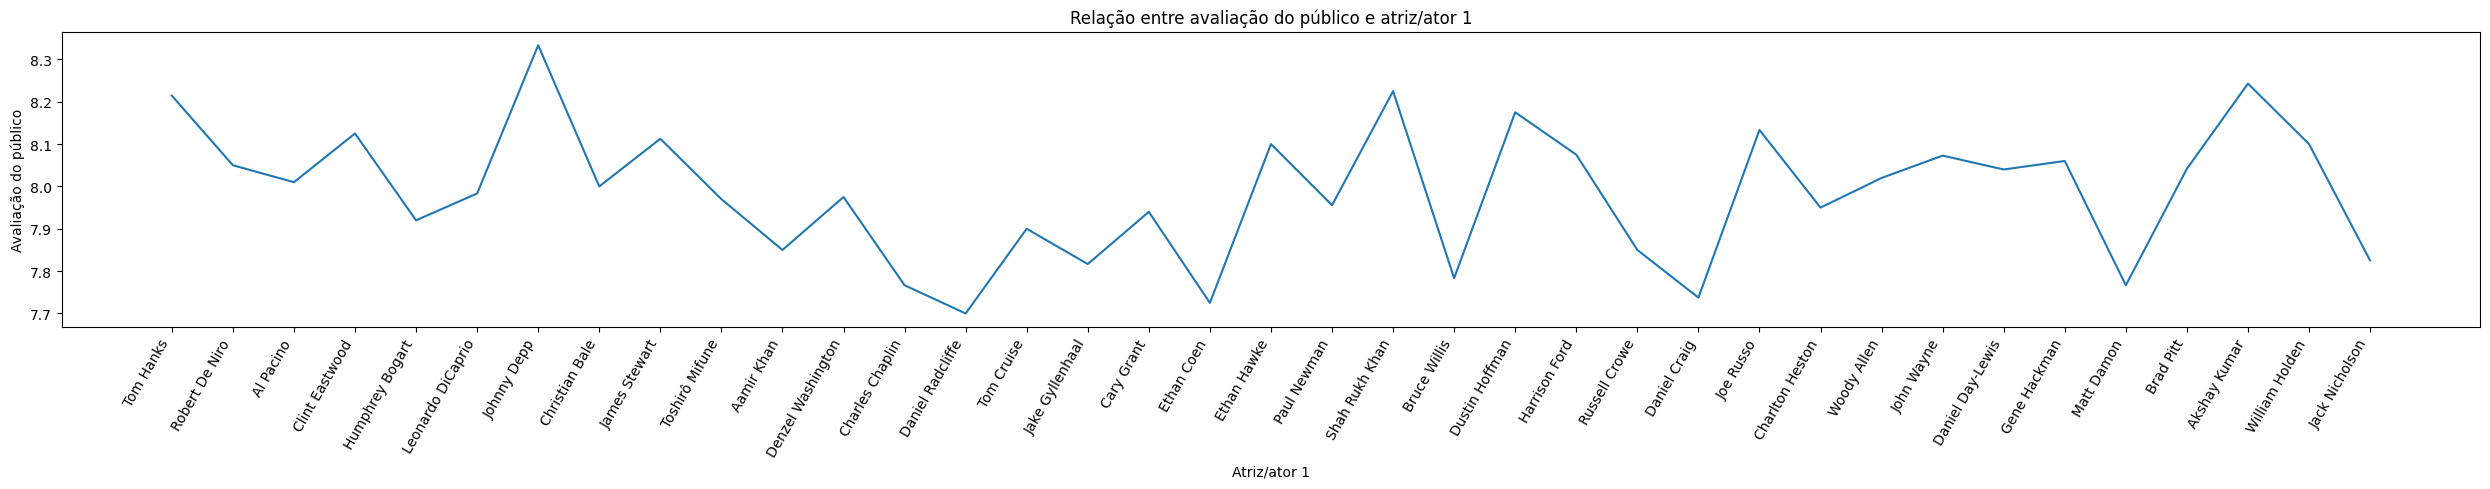

In [734]:
# Média das notas por ator/atriz 1 (notas dividido por quantidade de filmes)
mean_star1 = df_filtered_star1.groupby('Star1')['IMDB_Rating'].mean()

plt.figure(figsize=(25, 5))
sns.lineplot(x=star1_min4, y=mean_star1)
plt.title("Relação entre avaliação do público e atriz/ator 1")
plt.xlabel("Atriz/ator 1")
plt.xticks(rotation=60, ha='right')
plt.ylabel("Avaliação do público")
plt.tight_layout()
plt.show()

In [735]:
# Ajustando dados de Star2
pd.set_option('display.max_rows', None)
star2 = df.Star2.value_counts()
star2_min2 = star2[star2 >= 3].index
star2_min2

df_filtered_star2 = df[df['Star2'].isin(star2_min2)]

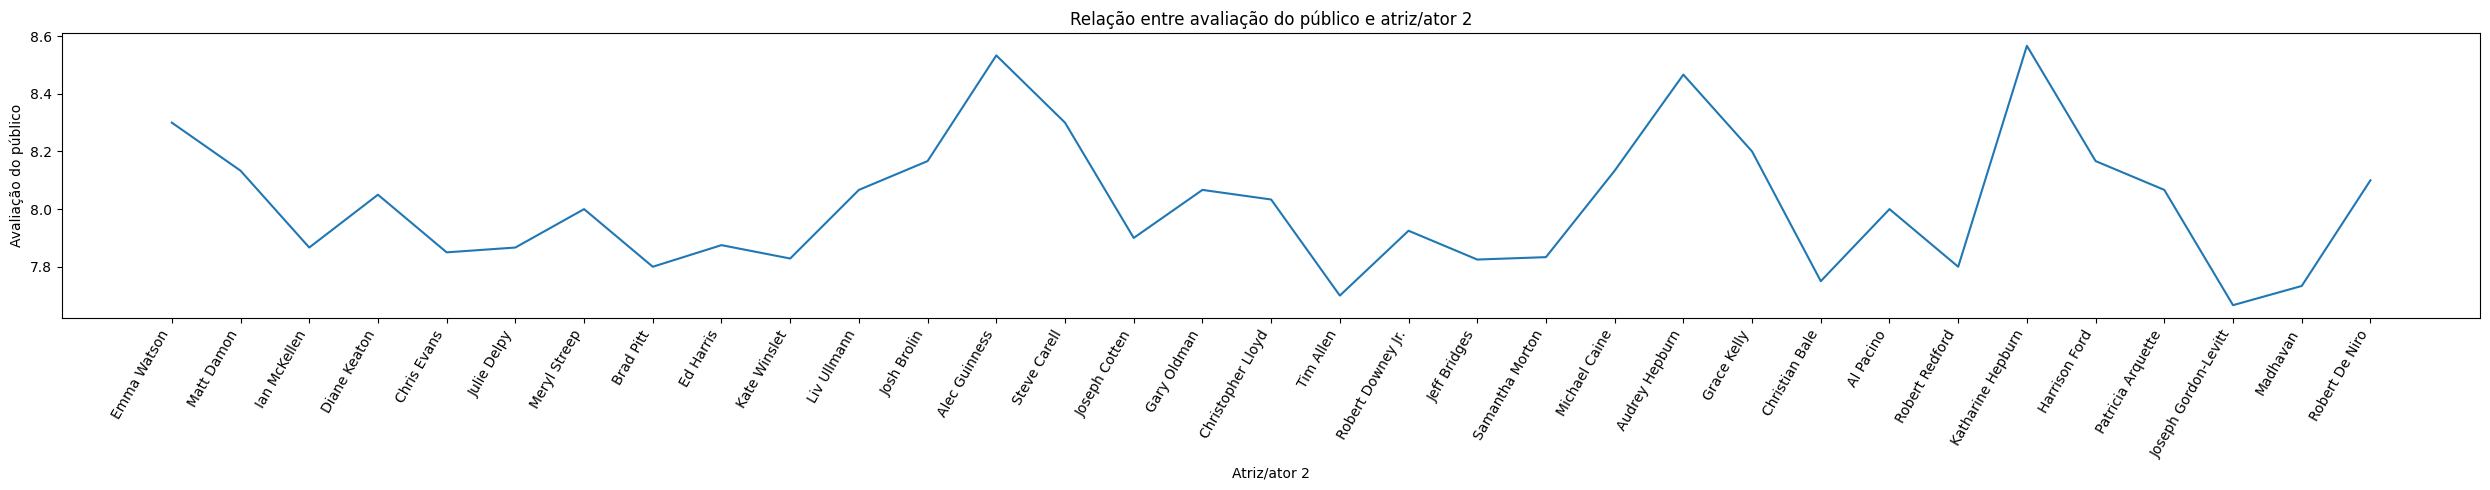

In [736]:
# Média das notas por ator/atriz 2 (notas dividido por quantidade de filmes)
mean_star2 = df_filtered_star2.groupby('Star2')['IMDB_Rating'].mean()

plt.figure(figsize=(25, 5))
sns.lineplot(x=star2_min2, y=mean_star2)
plt.title("Relação entre avaliação do público e atriz/ator 2")
plt.xlabel("Atriz/ator 2")
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.ylabel("Avaliação do público")
plt.show()

In [737]:
# Ajustando dados de Star3
pd.set_option('display.max_rows', None)
star3 = df.Star3.value_counts()
star3_min2 = star3[star3 >= 2].index
star3_min2

df_filtered_star3 = df[df['Star3'].isin(star3_min2)]

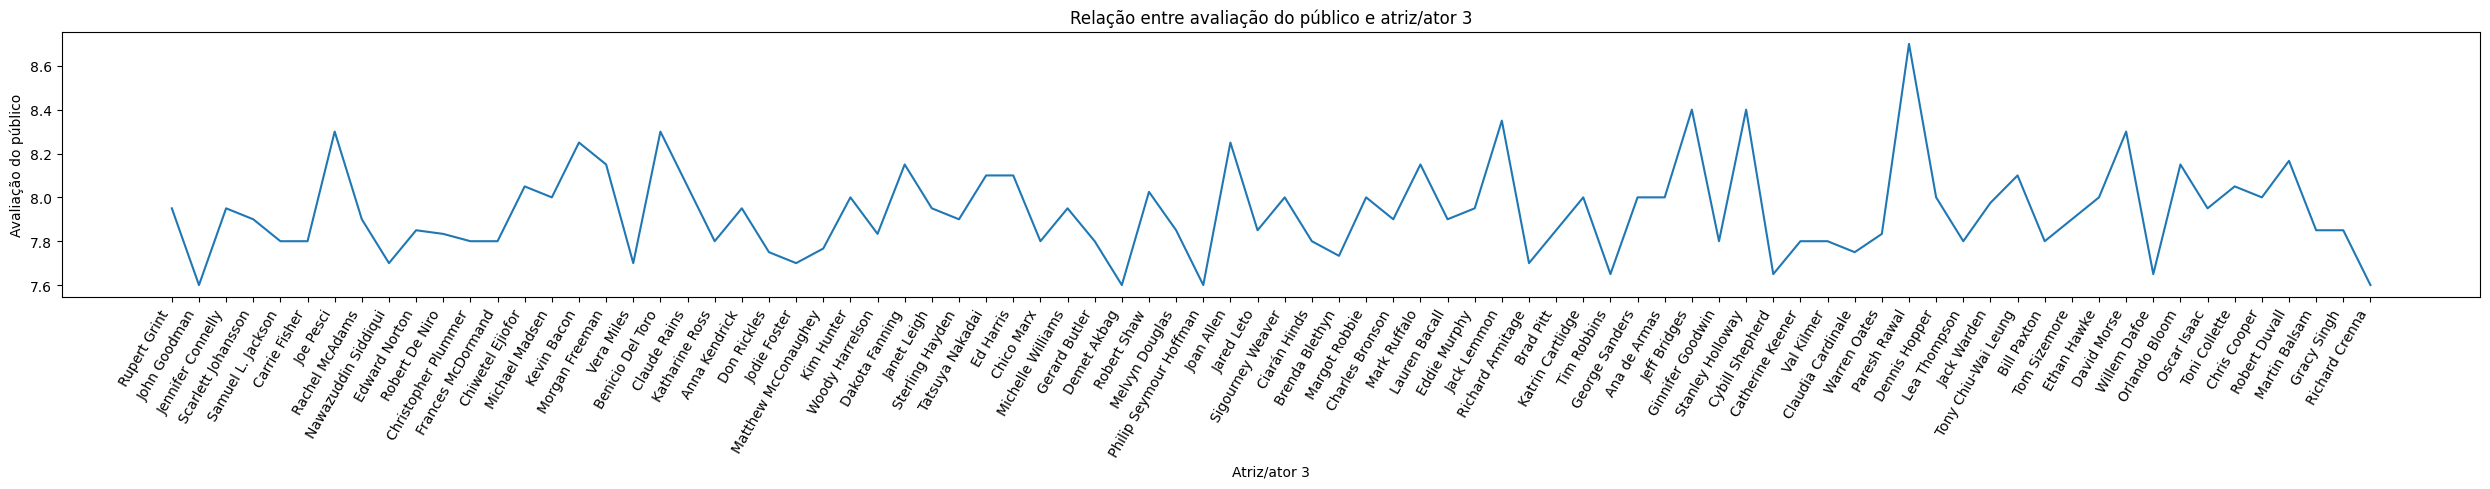

In [738]:
# Média das notas por ator/atriz 3 (notas dividido por quantidade de filmes)
mean_star3 = df_filtered_star3.groupby('Star3')['IMDB_Rating'].mean()

plt.figure(figsize=(25, 5))
sns.lineplot(x=star3_min2, y=mean_star3)
plt.title("Relação entre avaliação do público e atriz/ator 3")
plt.xlabel("Atriz/ator 3")
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.ylabel("Avaliação do público")
plt.show()

In [739]:
pd.set_option('display.max_rows', None)
star4 = df.Star4.value_counts()
star4_min2 = star4[star4 >= 2].index
star4_min2

df_filtered_star4 = df[df['Star4'].isin(star4_min2)]

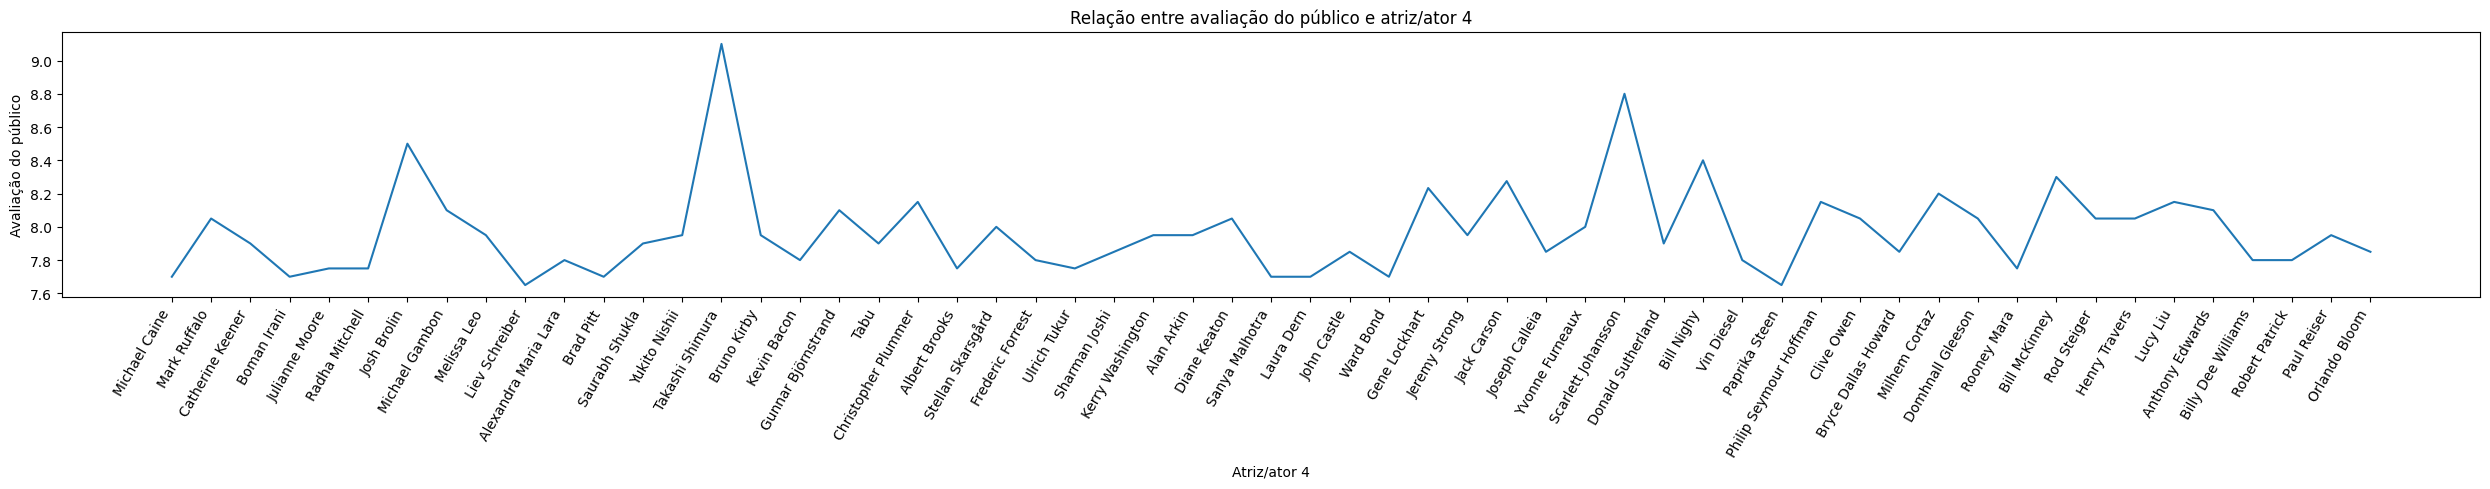

In [740]:
# Média das notas por ator/atriz 4 (notas dividido por quantidade de filmes)
mean_star4 = df_filtered_star4.groupby('Star4')['IMDB_Rating'].mean()

plt.figure(figsize=(25, 5))
sns.lineplot(x=star4_min2, y=mean_star4)
plt.title("Relação entre avaliação do público e atriz/ator 4")
plt.xlabel("Atriz/ator 4")
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.ylabel("Avaliação do público")
plt.show()

# **Como prever a nota de um filme no IMDB?**

A previsão de resultados por meio da relação entre as variáveis de entrada é um problema clássico de **regressão**, onde é necessário entender o grau de dependência entre elas e como elas influenciam uma a outra.

Nesse cenário, estamos usando variáveis de entrada independentes, como `Genre`, `Director`, `Star1` e outros, e relacionando elas entre si para criar uma variável dependente de saída, que é a nota do filme.

Antes de escolher o algoritmo para treinar o modelo, precisamos descobrir se os dados são lineares ou não lineares.


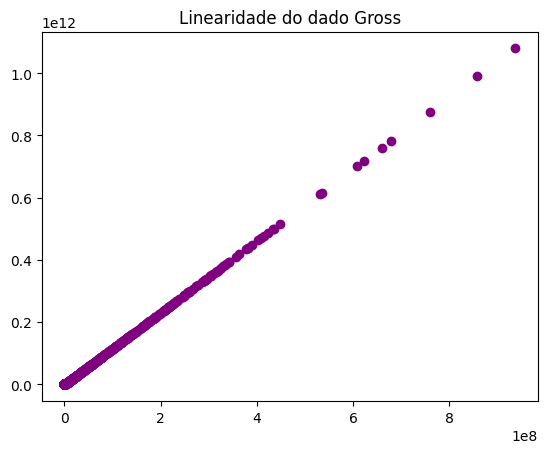

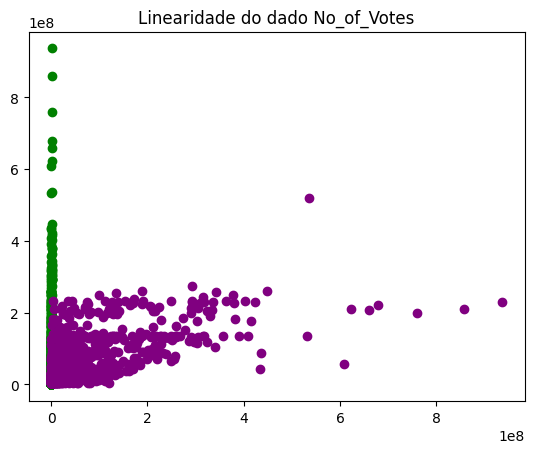

In [741]:
#Votos e receita bruta
votes_gross = LinearGAM(s(0)).fit(df.No_of_Votes.dropna(), df.Gross.fillna(0))
votes_pred = votes_gross.predict(df.No_of_Votes.dropna())
gross_pred = votes_gross.predict(df.Gross.fillna(0))

plt.scatter(df.No_of_Votes, df.Gross, color='green')
plt.scatter(df.Gross, gross_pred, color='purple')
plt.title("Linearidade do dado Gross")
plt.show()

plt.scatter(df.No_of_Votes, df.Gross, color='green')
plt.scatter(df.Gross, votes_pred, color='purple')
plt.title("Linearidade do dado No_of_Votes")
plt.show()

## **Conclusão a respeito da natureza dos dados**

Podemos afirmar que os dados do dataset não são lineares, portanto é necessário usar técnicas de regressão não linear. 

In [742]:
# Média das notas por diretor e atores 
mean_director_all = df.groupby('Director')['IMDB_Rating'].mean()
mean_star1_all = df.groupby('Star1')['IMDB_Rating'].mean()
mean_star2_all = df.groupby('Star2')['IMDB_Rating'].mean()
mean_star3_all = df.groupby('Star3')['IMDB_Rating'].mean()
mean_star4_all = df.groupby('Star4')['IMDB_Rating'].mean()

# Adicionando novas colunas ao dataframe
df['mean_director'] = df['Director'].map(mean_director_all)
df['mean_star1'] = df['Star1'].map(mean_star1_all)
df['mean_star2'] = df['Star2'].map(mean_star2_all)
df['mean_star3'] = df['Star3'].map(mean_star3_all)
df['mean_star4'] = df['Star4'].map(mean_star4_all)
df['classification'] = classification.fillna(0)

# Seleção dados para features
features = df[['No_of_Votes', 'Gross', 'mean_director', 'mean_star1', 
              'mean_star2', 'mean_star3', 'mean_star4', 'classification', 'Meta_score'
            ]]
target = df['IMDB_Rating']

x = features
y = target

In [743]:
# Separando dados de teste e treino para o modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.3, random_state=42)
print("Treino: ", x_train.shape, y_train.shape, "Teste: ", x_test.shape, y_test.shape)

# Treinando o modelo usando Random Forest 
model = RandomForestRegressor(n_estimators=200, random_state=42, max_depth=10)
model.fit(x_train, y_train)

Treino:  (699, 9) (699,) Teste:  (300, 9) (300,)


,n_estimators,200
,criterion,'squared_error'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [744]:
# Predição dos dados 
y_pred = model.predict(x_test)
y_pred

array([8.        , 7.7       , 8.08683333, 8.1       , 7.7       ,
       7.8       , 7.6       , 7.8955    , 8.        , 7.8       ,
       7.6       , 7.8       , 7.7       , 7.7005    , 7.7005    ,
       8.3995    , 7.7       , 7.86475   , 7.836     , 8.1       ,
       7.8005    , 7.998     , 7.6       , 7.6       , 7.6       ,
       8.3765    , 8.201     , 8.09683333, 7.7       , 7.9995    ,
       7.806     , 8.1       , 7.8055    , 7.9075    , 7.798     ,
       7.8       , 7.939     , 8.0995    , 7.86675   , 7.8       ,
       7.7       , 8.0015    , 7.6       , 8.        , 8.1       ,
       7.8005    , 8.1       , 7.7005    , 8.3375    , 7.777     ,
       8.0515    , 7.881     , 7.6       , 8.5055    , 8.596     ,
       8.        , 8.8285    , 7.9       , 7.926     , 7.822     ,
       8.412     , 7.8       , 7.7       , 7.8975    , 7.8       ,
       7.993     , 7.8995    , 7.8       , 8.0985    , 7.6       ,
       8.2775    , 8.2795    , 7.7705    , 8.198     , 7.899  

**ATENÇÃO** 

Às vezes o compilador confunde o nome das variáveis com os nomes das funções do sklearn, rode o caderno completo novamente caso isso acontecer, por favor 🩷

In [745]:
r2_metric = r2_score(y_test, y_pred)
print("R²: ", r2_metric)

R²:  0.9654045706976527


In [746]:
mae_result = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae_result)

MAE:  0.01850344444445475


In [747]:
mse_result = mean_squared_error(y_test, y_pred)
print("MSE: ", mse_result)

MSE:  0.0026796081962962553


In [748]:
dump(model, 'randomForestIMDB.pkl')
loaded_model = load('randomForestIMDB.pkl')

In [749]:
# Adicionando novo filme
new_movie = {
 'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': 28341469,
 'classification': 16,
 'mean_director': 0,
 'mean_star1': 0,
 'mean_star2': 0,
 'mean_star3': 0,
 'mean_star4': 0
}

df_new_movie = pd.DataFrame([new_movie]).fillna(0)
x_new = df_new_movie[model.feature_names_in_]

new_movie_pred = model.predict(x_new)
new_movie_pred

array([7.6])

The Shawshanks Redemption está avaliado em 9.3 no IMDB, então o modelo errou bem feio, mas isso se deve por causa da falta de dados e da falta de processamento das colunas `Genre` e `Overview`